<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/AdvML_L1S4_N1_ImplementingPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04_EX_01 Implementing a Single Neuron Perceptron

This exercise notebook focuses on the implementation of a single neuron perceptron from scratch.

## 1. Implementing the Perceptron class

The next cell contains a skeleton outline of a class Perceptron (method names and signatures
and field names are pre-defined).

Complete the implementation of the Perceptron based on:
 * decision function
 * learning rule

introduced in the 04_WeightBasedLearning_Perceptron slides.

The template for the class consists of the following methods:

* fit: train the Perceptron
* net_input: calculate the net_input
* predict: make a prediction based on a sample input

Complete the implementation of these three methods.
Your implementation has to be compatible with the

Hint: It is probably easiest to start with the `predict` method followed by `net_input`.




In [49]:
import numpy.random
import numpy as np

class Perceptron(object):

    """Perceptron binary classifier.

    Parameters
    -----------
    eta : float
       Learning rate (value between 0.0 and 1.0)
    epochs  : int
       Number of passes over the training set

    Attributes
    -----------
    w_  : 1d-array
       Weights after fitting.
    errors_   : list
       Number of updates (triggered by prediction != target)

    """

    def __init__(self, eta=0.01, epochs=10, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data; i.e. train the Perceptron

        Parameters
        -----------
        X : dataframe with shape - [n_samples, n_features]
          feature vectors, where n_samples is the number of samples
          in the data set, n_features is the number of features
        y : dataframe with shape = [n_samples].
            1 target value per sample (the label).

        Returns
        -----------
        self : object

        """

        # this initialize the weights
        rgen = numpy.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        # this will be used to store the number of updates per epoch
        self.errors_ = []


        for _ in range(self.epochs):

            # EXERCISE: implement the iteration over the training set samples in the
            # loop below. Increment the updates variable each time an udate is made.

            errors = 0 # => will be the number of updates; bc on every error, we update
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update # bias
                errors += int(update != 0.0)

            # after looping over the dateset, store the errors in this epoch in the list
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        """Calculate net input"""
        # EXERCISE: Implement the net input calculation based on using python standard methods
        net_input = np.dot(x, self.w_[1:]) + self.w_[0]  # dot product of inputs and weights, plus bias
        #solution: net_input = sum(t[0] * t[1] for t in zip(x, self.w_[1:])) + self.w_[0]
        return net_input

    def predict(self, x):
        """Predict based on computing the net input and the threshold function"""
        net_input = self.net_input(x)

        # EXERCISE: Implement the thresold function and return the prediction based on
        # net input.

        if net_input >= 0.0:
            prediction = 1
        elif net_input < 0.0:
            prediction = -1

        return prediction

## 2. Data Provision

The following cells are focused on:

* loading the IRIS dataset into a dataframe.
* transforming the dataset to a binary classification problem with 2 features
* plotting the transformed dataset

### 2.1 Load the Iris dataset into a dataframe

In [43]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 2.2. Apply Slicing to Create a Binary Classification Dataset

We apply two major transformations:

a) Slice the data to restrict the dataset to two plant species:
We do this, so we are able to classify with a 'vanilla' Perceptron implementation
using the simple binary threshold function.

b) Only use two of the four features: This makes it easier to comprehend what is going
on under the hood, and makes for easy 2D plotting.

<a id='plot_dataset'></a>

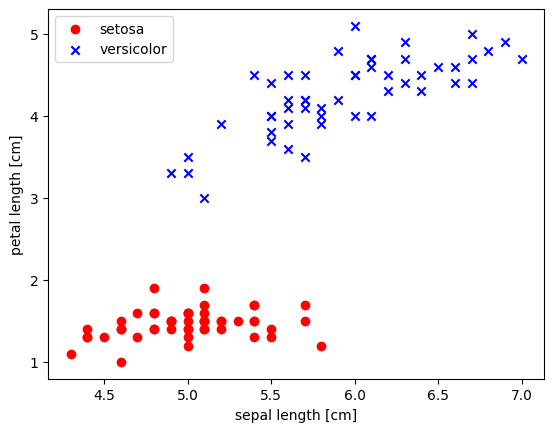

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# create a binary classification problem by selecting setosa and versicolor samples only
y = df.iloc[0:100, 4].values
# encode the labels as values -1 and 1
y = np.where(y == "Iris-setosa", -1, 1)

# select sepal length and petal length as features and store as X
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

### 2.3 Train Perceptron

Train the Perceptron with the $$X$$, $$y$$ dataset we have defined.

In [45]:
ppn = Perceptron(eta=0.01, epochs=10)
ppn.fit(X,y)

### 2.4 Plot Training Progress

Plot the training progress by looking at the number of updates triggered by $$ \hat{y} \neq y$$ (misclassification).
<a id='plot_training_progress'></a>

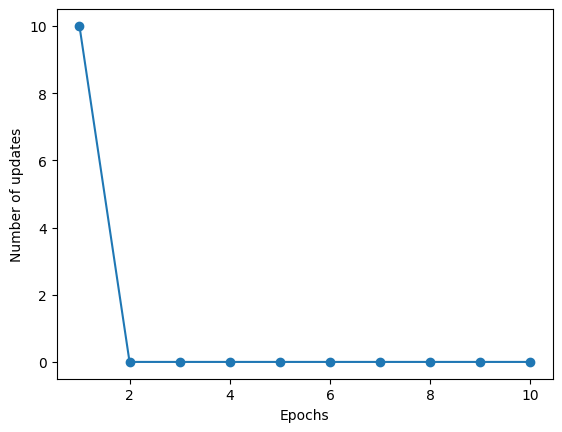

In [46]:
# Plot number of epochs versus number of updates (i.e. errors, false classifications).
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### 2.5 Questions

Write down your answers and thoughts on the following questions in this markdown cell.

**Question 1: What is the shape of the weight vector (i.e. its dimensionality)?**

...

**Question 2: To which feature do the weights in the following dimensions in the weight vector belong?**

* Dimension 1: sepal length in cm
* Dimension 2: petal length in cm

**Question 3: Just by looking at the plot under [2.2](#plot_dataset) what is your expectation for
 the trained weights in terms of being positive and negative.**

* Dimension 1:
* Dimension 2:

Hint: Remember we have defined `Iris-Setosa` as the discrete value `-1` and `Iris-Virginica` as `1`.

**Question 4: Describe in your own words what can be observed in plot [2.4](#plot_training_progress)?**

...

**Question 5: How many samples are misclassified in an epoch when the number of updates is 0?**

* Number of misclassified samples:

**Question 6: Confirm your observations made in relation to question 4 by looking at the
              change of the weights after each update (i.e. the state of the weight vector after each update).**
              
 ...

## 3. Plot Perceptron Decision Boundary

### 3.1 Create Random Dataset
The next cell defines a method to create a random dataset consisting of the two
selected species, and defines a plot that shows the decision boundary of the
Perceptron.

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    transposedObject = np.array([xx1.ravel(), xx2.ravel()]).T

    results = []
    for row in range(transposedObject.shape[0]):
        results.append(classifier.predict(transposedObject[row,:]))

    Z = np.reshape(results, xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')

### 3.2 Plot Decision Boundary

<ipython-input-47-7605415046b2>:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


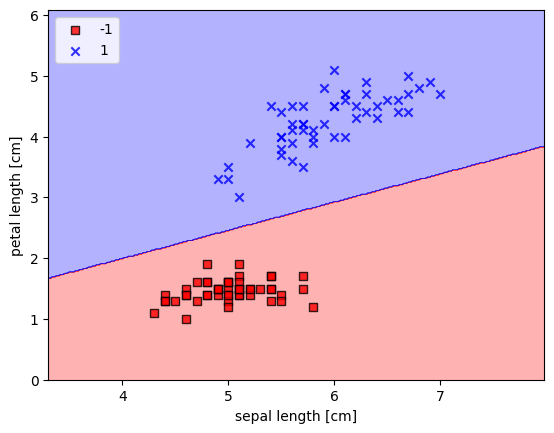

In [48]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()